In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from skimage.segmentation import mark_boundaries,  find_boundaries

In [3]:
def load_image(type_satellite, date):
    blue = np.load("../../GitHub/coral_mapping/images/"+type_satellite+"_L2A_"+date+"_maupiti_B02_new_rugo.npy")
    green = np.load("../../GitHub/coral_mapping/images/"+type_satellite+"_L2A_"+date+"_maupiti_B03_new_rugo.npy")
    red = np.load("../../GitHub/coral_mapping/images/"+type_satellite+"_L2A_"+date+"_maupiti_B04_new_rugo.npy")
    nir = np.load("../../GitHub/coral_mapping/images/"+type_satellite+"_L2A_"+date+"_maupiti_B08_new_rugo.npy")
    return(blue, green, red, nir)

In [8]:
maupiti_blue_20210803, maupiti_green_20210803, maupiti_red_20210803, maupiti_nir_20210803 = load_image('S2B', '20210803')

maupiti_blue_20220828, maupiti_green_20220828, maupiti_red_20220828, maupiti_nir_20220828 = load_image('S2B', '20220828')

maupiti_blue_20220917, maupiti_green_20220917, maupiti_red_20220917, maupiti_nir_20220917 = load_image('S2B', '20220917')

maupiti_blue_20230704, maupiti_green_20230704, maupiti_red_20230704, maupiti_nir_20230704 = load_image('S2B', '20230704')

maupiti_blue_20230803, maupiti_green_20230803, maupiti_red_20230803, maupiti_nir_20230803 = load_image('S2B', '20230803')

maupiti_blue_20230823, maupiti_green_20230823, maupiti_red_20230823, maupiti_nir_20230823 = load_image('S2B', '20230823')

maupiti_blue_mosaic_S2B_1, maupiti_green_mosaic_S2B_1, maupiti_red_mosaic_S2B_1, maupiti_nir_mosaic_S2B_1 = load_image('S2B', 'mosaic_20220907_20221116_20230204')

maupiti_blue_mosaic_S2B_2, maupiti_green_mosaic_S2B_2, maupiti_red_mosaic_S2B_2, maupiti_nir_mosaic_S2B_2 = load_image('S2B', 'mosaic_20220331_20221226_20230214')

In [9]:
maupiti_blue_20220316, maupiti_green_20220316, maupiti_red_20220316, maupiti_nir_20220316 = load_image('S2A', '20220316')

maupiti_blue_20221121, maupiti_green_20221121, maupiti_red_20221121, maupiti_nir_20221121 = load_image('S2A', '20221121')

maupiti_blue_mosaic_S2A, maupiti_green_mosaic_S2A, maupiti_red_mosaic_S2A, maupiti_nir_mosaic_S2A = load_image('S2A', 'mosaic_20220902_20230120_20230209_20230609')

In [4]:
from PIL import Image

In [56]:
list_red_images = [maupiti_red_20210803, maupiti_red_20220828, maupiti_red_20220917, maupiti_red_20230704,
                   maupiti_red_20230803, maupiti_red_20230823, maupiti_red_20220316, maupiti_red_20221121,
                  maupiti_red_mosaic_S2B_1, maupiti_red_mosaic_S2B_2, maupiti_red_mosaic_S2A]

list_nir_images = [maupiti_nir_20210803, maupiti_nir_20220828, maupiti_nir_20220917, maupiti_nir_20230704,
                   maupiti_nir_20230803, maupiti_nir_20230823, maupiti_nir_20220316, maupiti_nir_20221121,
                  maupiti_nir_mosaic_S2B_1, maupiti_nir_mosaic_S2B_2, maupiti_nir_mosaic_S2A]

list_blue_images = [maupiti_blue_20210803, maupiti_blue_20220828, maupiti_blue_20220917, maupiti_blue_20230704,
                   maupiti_blue_20230803, maupiti_blue_20230823, maupiti_blue_20220316, maupiti_blue_20221121,
                  maupiti_blue_mosaic_S2B_1, maupiti_blue_mosaic_S2B_2, maupiti_blue_mosaic_S2A]

list_green_images = [maupiti_green_20210803, maupiti_green_20220828, maupiti_green_20220917, maupiti_green_20230704,
                   maupiti_green_20230803, maupiti_green_20230823, maupiti_green_20220316, maupiti_green_20221121,
                  maupiti_green_mosaic_S2B_1, maupiti_green_mosaic_S2B_2, maupiti_green_mosaic_S2A]

In [73]:
for i in range(10):
    I = list_nir_images[i][250:378,350:478]

    I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

    img = Image.fromarray(I8)
    img.save("maupiti/test/NIR/imgset01/LR00"+str(i)+".png")
    
I = list_nir_images[10][250:378,350:478]

I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
img.save("maupiti/test/NIR/imgset01/LR010.png")
    

# Loading Planet image

In [6]:
from PIL import Image
import cv2

In [7]:
planet_img = cv2.imread('../../Sentinel images/MQ/Planet/PSScene/20231229_231147_67_24b6_3B_AnalyticMS_SR_clip.tif', 
                        cv2.IMREAD_UNCHANGED)

In [14]:
np.shape(planet_img)

(779, 1000)

In [12]:
img_scaled = cv2.normalize(planet_img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

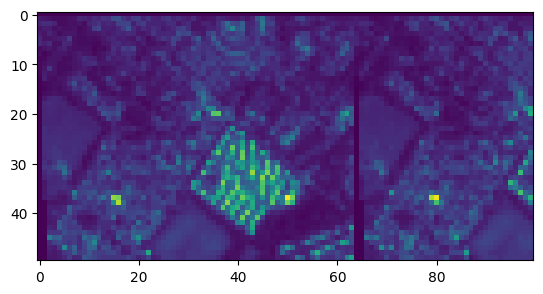

In [16]:
plt.imshow(img_scaled[:50,:100])

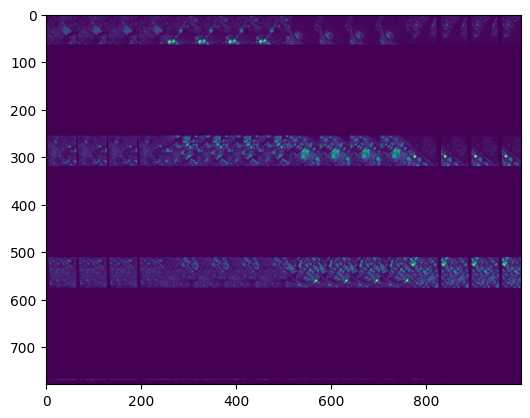

In [10]:
plt.imshow(planet_img/np.max(planet_img))